# ST4 MDS : TP 2 Model Based Agent

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

## AIMS of the TP : 
To investigate how price predictability can be detect, exploited, and
modified
* 1. Optimal learning and ploting
* 2. Distribution studies
* 3. r Characterization

In [2]:
import numpy as np 
import random as rd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import powerlaw as pw 
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd 

In [3]:
__author__ = "Colleville Tanguy, Matthieu Briet"
__copyright__ = "None"
__credits__ = ["None"]
__license__ = "None"
__version__ = "1.0.0"
__maintainer__ = "Colleville Tanguy, Matthieu Briet"
__email__ = "tanguy.colleville@student-cs.fr, matthieu.briet@student-cs.fr"
__status__ = "Dev"

## 1. Optimal learning and ploting

* 1. Choose a couple ($\sigma, \alpha >1$) and simulate 
$$ r_{t+1} = (\alpha - \hat{\alpha_t})*r_t +\epsilon_{t+1}$$
$$ \hat{\alpha_t} = \frac{r_t}{r_{t+1}} + \hat{\alpha_{t-1}}$$
* 2. Plot $r_{t+1}$ as a function of t. Comment. 

In [4]:
NIT=10000### nombre d'itérations 
sigma=4
alpha=2
epsilon=np.random.normal(0,sigma,size=NIT)
r0=1
color=['blue','yellow','red','green','black','orange','pink','grey','brown','purple']

In [5]:
def PawPat(r_0,alpha_chap_0,NIT=10000):
    """
Entries : r_initial --> float
          alpha_chap_0 --> float >1 
=========================================
Aim : Calculate the serie r_t and alpha_chap_t
=========================================
Outputs : R_series,Alpha_series
    """
    alpha_chap=[alpha_chap_0]
    r=[r_0,r_0+0.4]
    for i in range(1,NIT-1):
        alpha_chap.append(r[i]/r[i-1]+alpha_chap[i-1])
        r.append((alpha-alpha_chap[i])*r[i]+epsilon[i+1])
    return r,alpha_chap

PawPat calcule $$ r_{t+1} = (\alpha - \hat{\alpha_t})*r_t +\epsilon_{t+1}$$
$$ \hat{\alpha_t} = \frac{r_t}{r_{t+1}} + \hat{\alpha_{t-1}}$$ 
à partir d'un $r_{initial}$ et d'un $\hat{alpha_{initial}}$

ipykernel_launcher:13: RuntimeWarning: invalid value encountered in double_scalars


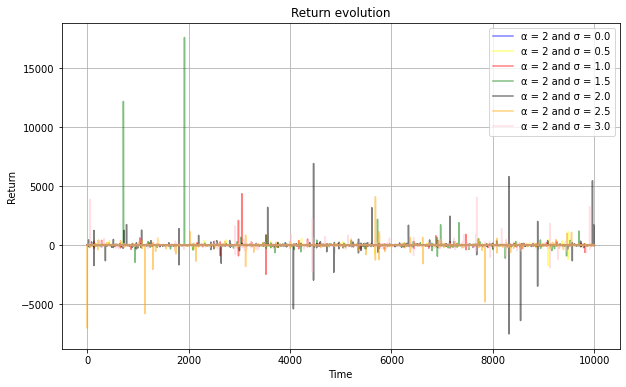

In [6]:
sigmas=np.linspace(0,3,7)
plt.figure(figsize=(10,6))
for index,sig in enumerate(sigmas):
    epsilon= epsilon=np.random.normal(0,sig,size=NIT)
    plt.plot(PawPat(r0,alpha)[0],c=color[index],label=f"\u03B1 = {alpha} and \u03C3 = {round(sig,3)}",alpha=0.5)
plt.title("Return evolution")
plt.xlabel("Time")
plt.ylabel("Return")
# plt.yscale("log")
plt.grid()
plt.legend()
plt.show()  

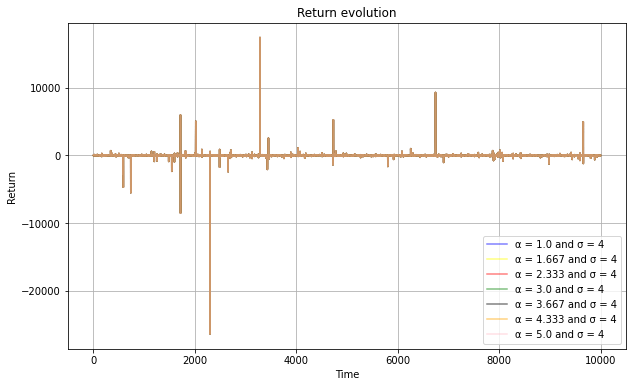

In [10]:
alphas=np.linspace(1,5,7)
plt.figure(figsize=(10,6))
epsilon=np.random.normal(0,sigma,size=NIT)
for index,alpha in enumerate(alphas):
    plt.plot(PawPat(r0,alpha)[0],c=color[index],label=f"\u03B1 = {round(alpha,3)} and \u03C3 = {sigma}",alpha=0.5)
plt.title("Return evolution")
plt.xlabel("Time")
plt.ylabel("Return")
plt.grid()
plt.legend()
plt.show()  

On voit des variations très fortes en amplitudes et avec un return proche de 0. Le rapport signal-to-noise est presque nul, ce qui indique qu'on se rapproche d'un bruit. On peut voir que l'erreur en αt explose poru des petites valeurs du return r.

## 2. Distribution studies


* 1. Plot P(|r|>R), ita est 1-ecdf with logarithmic axes
* 2. Has  P(|r|>R) heavy tail ? 
* 3. Compute the tail exponent of  P(|r|)$\alpha |r|^{-\gamma}$  and check whether mypl.alpha is $\gamma$ or $\gamma +1$

In [11]:
sigma=1.8
alpha=1.08
np.random.seed(0)
epsilon=np.random.normal(0,sigma,size=10000)
R=PawPat(r0,alpha,10000)[0]
R_abs=np.abs(R)
X=np.linspace(0, np.max(R_abs))
X_max=np.max(R_abs)
ecdf=ECDF(R_abs)
Y=1-ecdf(X)

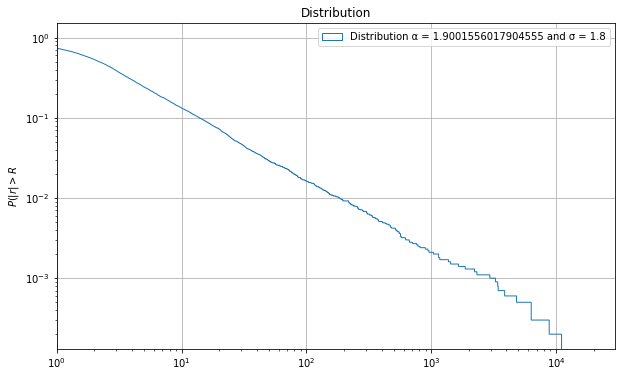

In [33]:
plt.figure(figsize=(10,6))
bn = sorted(set(R_abs))
plt.hist(R_abs,bins=bn,density=True,cumulative=-1,histtype='step',label=f"Distribution \u03B1 = {alpha} and \u03C3 = {sigma}")
plt.title("Distribution")
plt.ylabel(r"$P(|r|>R$")
plt.yscale("log")
plt.xscale("log")
plt.xlim(left=1e0)
plt.legend()
plt.grid()
plt.show()

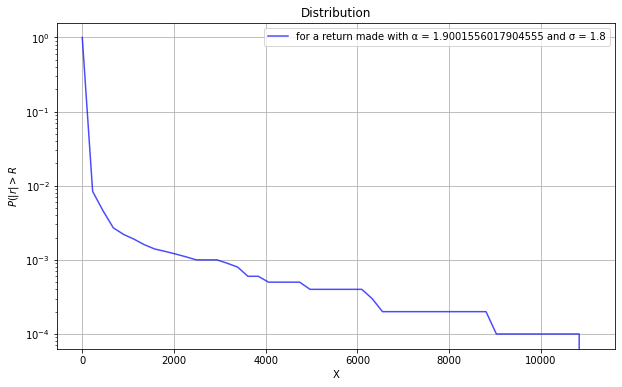

In [34]:
plt.figure(figsize=(10,6))
plt.plot(X,Y,c="blue",alpha=0.7,label=f"for a return made with \u03B1 = {alpha} and \u03C3 = {sigma}")
plt.title("Distribution")
plt.xlabel("X")
plt.ylabel(r"$P(|r|>R$")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

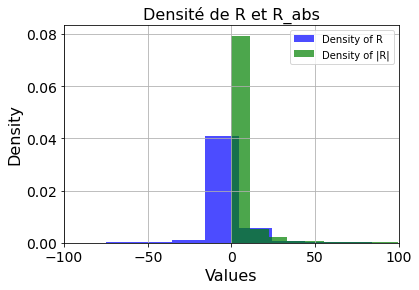

In [25]:
plt.hist(R,bins=1000,density=True,color="blue",alpha=0.7,label="Density of R")
plt.hist(R_abs,bins=1000,density=True,color="green",alpha=0.7,label="Density of |R|")
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.title("Densité de R et R_abs",fontsize=16)
plt.xlabel("Values", fontsize=16)
plt.xlim(left=-100,right=100)## même s'il y a des valeurs en dehors de [-100 ; 100] qui sont des limites imposées par soucis de clarté
plt.legend()
plt.show()

P(r)  is a heavy-tailed if : 
$\lim_{x \to +\infty} e^{\lambda r } \times P(r) = \infty, \forall \lambda > 0 $
In a log scale on Y axis we should see a line $-\gamma log(|r|) $ and above the P(r).
If the log plot of the tail is decreasing linearly, it means it's dominated by every exponential tail => Heavy tailed

In [26]:
ft=pw.Fit(R_abs)
alpha=ft.alpha
X_min=ft.xmin

Calculating best minimal value for power law fit
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [27]:
def plot_PL(xmin,xmax,ymax,alpha):
    ## y max est le facteur juste pour ajuster ta courbe et la rapporhcer de ta distribtion
    dx = np.linspace(xmin,xmax,5) #also 2 are enough 
    
    y = dx**(-alpha)
    
    return dx,ymax*y/y[0]

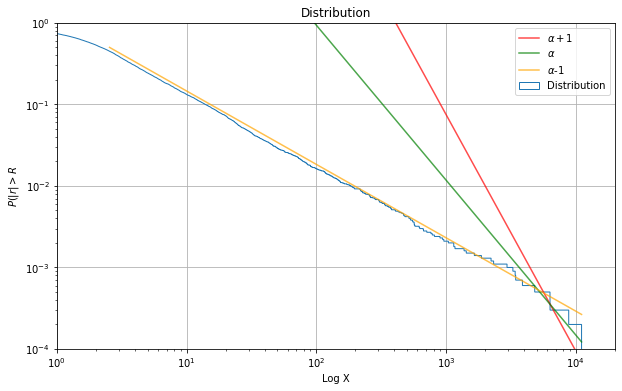

In [29]:
plt.figure(figsize=(10,6))
pt_dep_alpha=1000
pt_dep_alpha_1=0.5
pt_dep_gamma=2500000
dx,dy=plot_PL(X_min,X_max,pt_dep_gamma,alpha+1)
plt.plot(dx,dy,c="red",alpha=0.7,label=r"$\alpha+1$")
dx,dy=plot_PL(X_min,X_max,pt_dep_alpha,alpha)
plt.plot(dx,dy,c="green",alpha=0.7,label=r"$\alpha$")
dx,dy=plot_PL(X_min,X_max,pt_dep_alpha_1,alpha-1)
plt.plot(dx,dy,c="orange",alpha=0.7,label=r"$\alpha$-1")
bn = sorted(set(R_abs))
plt.hist(R_abs,bins=bn,density=True,cumulative=-1,histtype='step',label="Distribution")
plt.title("Distribution")
plt.xlabel("Log X")
plt.ylabel(r"$P(|r|>R$")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim(xmin=1e0,xmax=2e4)
plt.ylim(ymax=1,ymin=1e-4)
plt.grid()
plt.show()

Pour conclure on en déduit que $P|r|>R$ est heavy tailed et que mypl.alpha = $\gamma$ +1 

## 3. r Characterization

Characterize how r depends on $ \alpha$ and $ \sigma$ : 
* 1. Create a plot of the empirical average of $|r|^{\frac{1}{2}}$ as a function of α and σ; comment.
* 2. Create a plot of exponent γ as a function of α and σ; comment.

In [78]:
def PawPat_mod(r_0,alpha_chap_0,alpha,sigma,Nit=10000):# same function as above but with more parameters
    """
Entries : r_initial --> float
          alpha_chap_0 --> float >1 : initial value for alpha_t
          alpha --> float >1 : valeur vers laquelle alpha_t doit converger ou non 
          sigma--> float >0 : valeur de la variance de la distribution de espilon_t
          Nit --> nombre de valeurs 
    =========================================
    Aim : Calculate the serie r_t and alpha_chap_t
    =========================================
    Outputs : R_series,Alpha_series
    """
    alpha_chap=[alpha_chap_0]
    epsilon=np.random.normal(0,sigma,size=Nit)
    r=[r_0,r_0+0.4]
    for i in range(1,Nit-1):
        alpha_chap.append(r[i]/r[i-1]+alpha_chap[i-1])
        r.append((alpha-alpha_chap[i])*r[i]+epsilon[i+1])
    return r,alpha_chap

In [79]:
def exponent(r):
    """
Entries : the return series : list or np.array
========================================
Aim : To get the gamma exponent of the distribution
========================================
Outputs : The gamma exponent of the distribution
    """
    return pw.Fit(np.abs(r)).alpha -1

In [80]:
alpha=np.linspace(1,5,50)
sigma=np.linspace(1,5,50)
r=np.array([np.mean(np.sqrt(np.abs(PawPat_mod(r0,1,a,s)[0]))) for a in alpha for s in sigma])

In [81]:
myalpha=np.array([a for a in alpha for s in sigma])
mysigma=np.array([s for a in alpha for s in sigma])

In [82]:
df = pd.DataFrame.from_dict(np.array([myalpha,mysigma,r]).T)
df.columns = ['alpha','sigma','r']
df['r'] = pd.to_numeric(df['r'])
df

,alpha,sigma,r
0,1.0,1.000000,1.528144
1,1.0,1.081633,1.634786
2,1.0,1.163265,1.669364
3,1.0,1.244898,1.714291
4,1.0,1.326531,1.832655
...,...,...,...
2495,5.0,4.673469,3.386434
2496,5.0,4.755102,3.364792
2497,5.0,4.836735,3.447931
2498,5.0,4.918367,3.415530


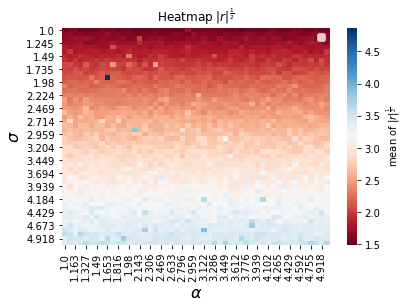

In [83]:
df=df.round(3)
pivotted= df.pivot('sigma','alpha','r')
ax=sns.heatmap(pivotted,cmap='RdBu',cbar_kws={'label': r'mean of $|r|^\frac{1}{2}$'})
plt.title(r"Heatmap $|r|^\frac{1}{2}$")
plt.xlabel(r"$\alpha$",size=16)
plt.ylabel(r"$\sigma$",size=16)
plt.legend()
plt.show()

On peut voir que $\sigma$ a un fort impact sur les valeurs de moyenne empirique des $|r|^\frac{1}{2}$, tandis qu'$\alpha$ n'impact pas cette dernière.  En effet, à $\sigma$ fixé la valeur d'$\alpha$ n'influe en rien celle de la mpyenne empirique, l'évolution semble même lineaire.

In [84]:
alpha=np.linspace(1,7,25)
sigma=np.linspace(1,7,25)
gammas=np.array([exponent(PawPat_mod(r0,1,a,s,Nit=1000)[0]) for a in alpha for s in sigma])

law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating 

In [85]:
myalpha=np.array([a for a in alpha for s in sigma])
mysigma=np.array([s for a in alpha for s in sigma])

In [86]:
dfg = pd.DataFrame.from_dict(np.array([myalpha,mysigma,gammas]).T)
dfg.columns = ['alpha','sigma','gammas']
dfg['gammas'] = pd.to_numeric(dfg['gammas'])
dfg

,alpha,sigma,gammas
0,1.0,1.00,0.877079
1,1.0,1.25,0.895410
2,1.0,1.50,0.904612
3,1.0,1.75,0.814816
4,1.0,2.00,1.044724
...,...,...,...
620,7.0,6.00,0.909621
621,7.0,6.25,0.879659
622,7.0,6.50,0.856098
623,7.0,6.75,0.838418


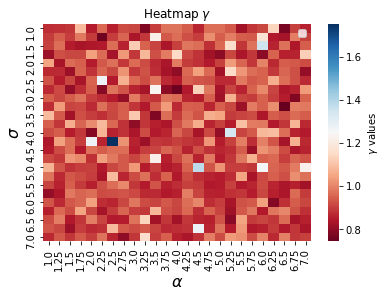

In [87]:
dfg=dfg.round(3)
pivotted_g= dfg.pivot('sigma','alpha','gammas')
ax=sns.heatmap(pivotted_g,cmap='RdBu',cbar_kws={'label': r'$\gamma$ values'})
plt.title(r"Heatmap $\gamma$")
plt.xlabel(r"$\alpha$",size=16)
plt.ylabel(r"$\sigma$",size=16)
plt.legend()
plt.show()

Sur cette heatmap, on a l'impression qu'il n'y a pas de répartition claire des valeurs de gamma en fonction de celles de sigma et alpha. On notera tout de même un maximum de gamma pour alpha=2.25 et sigma=5. 

## Conclusion 

Au travers de ce tp nous avons pu voir qu'une telle construction du return induisait des variations énormes du log return avec une moyenne et un signal-to-noise presque nul et nous avons pu developper une méthode de caractérisation de distribution afin de savoir si elle était heavy tailed. Enfin nous avons pu mettre en exergue un lien entre $\sigma$ et la moyenne empirique des $|r|^{\frac{1}{2}}$. En revanche il ne semple pas exister de lien trivial entre $\alpha$, $\sigma$ et $\gamma$.